> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: FBI Gun Data Exploration and Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

> **Notes**: The source of the data is NICS (FBI-National Instant Criminal Background Check System). This procedure is used to determine if a potential buyer is eligible to buy firearms and explosives. The NCIS data is found in the excel sheet. It has the data of number of firearms type, state and month. The data spreads across from Nov-1998 till Sept-2017. The United States Census data is available in a csv file. The data contains variables at state level.

> **Questions**: (what are the questions we wish to answer using the data.
    - Which state has the highest total purchases in April 2010 and April 2015?
    - What is per capita firearm sales for all states in April 2010 vs July 2016? 

In [239]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
from statistics import mode
import datetime
from IPython.display import display

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
sns.set_style('darkgrid')

df_cesus = pd.read_excel('U.S. Census Data.xlsx')
df_gun = pd.read_excel('gun_data.xlsx')


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [240]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#df_cesus.reset_index(drop=True, inplace=True)

display(df_cesus.head())
display(df_gun.head())


,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,4863300,4780131,0.017,4779736,0.060,0.064,0.226,0.237,0.161,0.138,0.516,0.515,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658,363170,0.035,2230185,2171853,0.687,125500,1139,345,717,15001,1848325,2.55,0.853,0.052,0.843,0.235,0.118,0.107,0.580,0.530,7576462,26039632,124809759,57746565,58564965,12145,24.4,43623,24091,0.171,98540,1634391,67370353,0.019,322025,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33,"""01"""
1,Alaska,741894,710249,0.045,710231,0.073,0.076,0.252,0.264,0.104,0.077,0.477,0.480,0.661,0.038,0.152,0.063,0.013,0.073,0.070,0.612,69323,0.074,310658,306967,0.634,250000,1827,554,1146,1503,250969,2.81,0.809,0.162,0.921,0.280,0.081,0.155,0.677,0.650,2221335,6375483,D,5216303,10474275,14320,19.0,72515,33413,0.099,20907,267999,15643303,0.004,55521,68032,

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,200.0,154.0,2.0,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,1474.0,748.0,3.0,82.0,5.0,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,1296.0,1824.0,4.0,0.0,0.0,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,535.0,397.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [243]:
df_cesus.set_index('State', inplace=True)
df_cesus

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,4863300,4780131,0.017,4779736,0.060,0.064,0.226,0.237,0.161,0.138,0.516,0.515,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658,363170,0.035,2230185,2171853,0.687,125500,1139,345,717,15001,1848325,2.55,0.853,0.052,0.843,0.235,0.118,0.107,0.580,0.530,7576462,26039632,124809759,57746565,58564965,12145,24.4,43623,24091,0.171,98540,1634391,67370353,0.019,322025,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33,"""01"""
Alaska,741894,710249,0.045,710231,0.073,0.076,0.252,0.264,0.104,0.077,0.477,0.480,0.661,0.038,0.152,0.063,0.013,0.073,0.070,0.612,69323,0.074,310658,306967,0.634,250000,1827,554,1146,1503,250969,2.81,0.809,0.162,0.921,0.280,0.081,0.155,0.677,0.650,2221335,6375483,D,5216303,10474275,14320,19

In [244]:
# lets try and get the idea about dimension of the dataframes.

print('Census shape: '+ str(df_cesus.shape))
print('Gun shape: ' + str(df_gun.shape))

Census shape: (50, 65)
Gun shape: (12485, 27)


In [245]:
# lets get the information on data types of each of the columns using info()

df_cesus.info();

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 65 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     int64  
 1   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     int64  
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     float64
 3   Population, Census, April 1, 2010                                                       50 non-null     int64  
 4   Persons under 5 years, percent, July 1, 2016,  (V2016)                                  50 non-null     float64
 5   Persons under 5 years, percent, April 1, 2010                      

In [246]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [247]:
df_cesus.describe() 

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
count,5.000000e+01,5.000000e+01,50.000000,5.000000e+01,50.000000,50.000000,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.00000,50.000000,5.000000e+01,50.000000,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.00000,5.000000e+01,50.000000,50.000000
mean,6.448927e+06,6.163127e+06,0.041800,6.162876e+06,0.061600,0.065460,0.22750,0.238820,0.156160,0.13292,0.505640,0.506620,0.793080,0.110240,0.019980,0.04342,0.029440,0.11714,0.693200,4.015940e+05,0.089620,2.707684e+06,2.628160e+06,0.659780,192026.000000,1462.200000,470.500000,879.880000,24039.040000,2.333058e+06

In [248]:
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,10545.000000,10544.000000,5115.000000,2200.000000,2145.000000,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,407.970413,599.332417,1.815249,29.612727,7.557576,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,783.467053,952.144809,4.574641,81.943020,22.097046,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,39.000000,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,561.000000,872.000000,2.000000,16.000000,4.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,10046.000000,8831.000000,79.000000,603.000000,168.000000,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [249]:
# lets try and look at the column names to see what data are we dealing with

for i, v in enumerate(df_cesus.columns):
    print(i,v)

0 Population estimates, July 1, 2016,  (V2016)
1 Population estimates base, April 1, 2010,  (V2016)
2 Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
3 Population, Census, April 1, 2010
4 Persons under 5 years, percent, July 1, 2016,  (V2016)
5 Persons under 5 years, percent, April 1, 2010
6 Persons under 18 years, percent, July 1, 2016,  (V2016)
7 Persons under 18 years, percent, April 1, 2010
8 Persons 65 years and over, percent,  July 1, 2016,  (V2016)
9 Persons 65 years and over, percent, April 1, 2010
10 Female persons, percent,  July 1, 2016,  (V2016)
11 Female persons, percent, April 1, 2010
12 White alone, percent, July 1, 2016,  (V2016)
13 Black or African American alone, percent, July 1, 2016,  (V2016)
14 American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
15 Asian alone, percent, July 1, 2016,  (V2016)
16 Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)
17 Two or More Races, percent, 

In [250]:
for i, v in enumerate(df_gun.columns):
    print(i,v)

0 month
1 state
2 permit
3 permit_recheck
4 handgun
5 long_gun
6 other
7 multiple
8 admin
9 prepawn_handgun
10 prepawn_long_gun
11 prepawn_other
12 redemption_handgun
13 redemption_long_gun
14 redemption_other
15 returned_handgun
16 returned_long_gun
17 returned_other
18 rentals_handgun
19 rentals_long_gun
20 private_sale_handgun
21 private_sale_long_gun
22 private_sale_other
23 return_to_seller_handgun
24 return_to_seller_long_gun
25 return_to_seller_other
26 totals


Upon observation of data manually, I came to observe that the states are not consistent in both the data. Upon observing the Census data source I found out 5 states that are not present in the Gun data namely Guam, Puerto Rico, District of Columbia, Virgin Islands, and Mariana Islands. We will have to eliminate to avoid unneccessary confusion in analysis.

In [251]:
# removing the data related to all that 5 states from the Guns data
print(df_gun.state.nunique())

df_gun = df_gun[df_gun.state!='Guam']
df_gun = df_gun[df_gun.state!='Puerto Rico']
df_gun = df_gun[df_gun.state!='District of Columbia']
df_gun = df_gun[df_gun.state!='Virgin Islands']
df_gun = df_gun[df_gun.state!='Mariana Islands']

55


In [252]:
df_cesus.dtypes

Population estimates, July 1, 2016,  (V2016)                                                int64
Population estimates base, April 1, 2010,  (V2016)                                          int64
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     float64
Population, Census, April 1, 2010                                                           int64
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    float64
Persons under 5 years, percent, April 1, 2010                                             float64
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   float64
Persons under 18 years, percent, April 1, 2010                                            float64
Persons 65 years and over, percent,  July 1, 2016,  (V2016)                               float64
Persons 65 years and over, percent, April 1, 2010                                         float64
Female persons, perc

In [253]:
df_gun.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [254]:
# Checking for duplicates

sum(df_cesus.duplicated())

0

In [255]:
sum(df_gun.duplicated())

0

In [256]:
# Check if any value is Nan in the dataframe and how many columns have Nan values

df_cesus.isnull().any().any(), sum(df_cesus.isnull().any())

(False, 0)

In [257]:
df_cesus.isnull().any()

Population estimates, July 1, 2016,  (V2016)                                              False
Population estimates base, April 1, 2010,  (V2016)                                        False
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     False
Population, Census, April 1, 2010                                                         False
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    False
Persons under 5 years, percent, April 1, 2010                                             False
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   False
Persons under 18 years, percent, April 1, 2010                                            False
Persons 65 years and over, percent,  July 1, 2016,  (V2016)                               False
Persons 65 years and over, percent, April 1, 2010                                         False
Female persons, percent,  July 1, 2016, 

In [258]:
df_gun.isnull().any().any(), sum(df_gun.isnull().any())


(True, 21)

In [259]:
df_gun.isnull().any()

month                        False
state                        False
permit                        True
permit_recheck                True
handgun                      False
long_gun                     False
other                         True
multiple                     False
admin                         True
prepawn_handgun               True
prepawn_long_gun              True
prepawn_other                 True
redemption_handgun            True
redemption_long_gun           True
redemption_other              True
returned_handgun              True
returned_long_gun             True
returned_other                True
rentals_handgun               True
rentals_long_gun              True
private_sale_handgun          True
private_sale_long_gun         True
private_sale_other            True
return_to_seller_handgun      True
return_to_seller_long_gun     True
return_to_seller_other        True
totals                       False
dtype: bool

In [260]:
df_cesus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 65 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     int64  
 1   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     int64  
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     float64
 3   Population, Census, April 1, 2010                                                       50 non-null     int64  
 4   Persons under 5 years, percent, July 1, 2016,  (V2016)                                  50 non-null     float64
 5   Persons under 5 years, percent, April 1, 2010                      

In [261]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      11350 non-null  object 
 1   state                      11350 non-null  object 
 2   permit                     11348 non-null  float64
 3   permit_recheck             1000 non-null   float64
 4   handgun                    11350 non-null  float64
 5   long_gun                   11350 non-null  float64
 6   other                      5000 non-null   float64
 7   multiple                   11350 non-null  int64  
 8   admin                      11348 non-null  float64
 9   prepawn_handgun            9597 non-null   float64
 10  prepawn_long_gun           9595 non-null   float64
 11  prepawn_other              4650 non-null   float64
 12  redemption_handgun         9600 non-null   float64
 13  redemption_long_gun        9598 non-null   flo

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

In [262]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


# Lets start cleaning process by dropping the unnecessary data points.

df_cesus.drop_duplicates(inplace=True)
sum(df_cesus.duplicated())


0

In [263]:
df_gun.drop_duplicates(inplace=True)
sum(df_gun.duplicated())

0

In [264]:
'''
A good analysis are with good aesthetics and to get to that, we will have to change the column names into a uniform 
case and make it all into lower for convenience
'''

df_cesus.rename(columns = lambda x: x.lower(), inplace=True)
df_cesus.head()


,"population estimates, july 1, 2016, (v2016)","population estimates base, april 1, 2010, (v2016)","population, percent change - april 1, 2010 (estimates base) to july 1, 2016, (v2016)","population, census, april 1, 2010","persons under 5 years, percent, july 1, 2016, (v2016)","persons under 5 years, percent, april 1, 2010","persons under 18 years, percent, july 1, 2016, (v2016)","persons under 18 years, percent, april 1, 2010","persons 65 years and over, percent, july 1, 2016, (v2016)","persons 65 years and over, percent, april 1, 2010","female persons, percent, july 1, 2016, (v2016)","female persons, percent, april 1, 2010","white alone, percent, july 1, 2016, (v2016)","black or african american alone, percent, july 1, 2016, (v2016)","american indian and alaska native alone, percent, july 1, 2016, (v2016)","asian alone, percent, july 1, 2016, (v2016)","native hawaiian and other pacific islander alone, percent, july 1, 2016, (v2016)","two or more races, percent, july 1, 2016, (v2016)","hispanic or latino, percent, july 1, 2016, (v2016)","white alone, not hispanic or latino, percent, july 1, 2016, (v2016)","veterans, 2011-2015","foreign born persons, percent, 2011-2015","housing units, july 1, 2016, (v2016)","housing units, april 1, 2010","owner-occupied housing unit rate, 2011-2015","median value of owner-occupied housing units, 2011-2015","median selected monthly owner costs -with a mortgage, 2011-2015","median selected monthly owner costs -without a mortgage, 2011-2015","median gross rent, 2011-2015","building permits, 2016","households, 2011-2015","persons per household, 2011-2015","living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","language other than english spoken at home, percent of persons age 5 years+, 2011-2015","high school graduate or higher, percent of persons age 25 years+, 2011-2015","bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","with a disability, under age 65 years, percent, 2011-2015","persons without health insurance, under age 65 years, percent","in civilian labor force, total, percent of population age 16 years+, 2011-2015","in civilian labor force, female, percent of population age 16 years+, 2011-2015","total accommodation and food services sales, 2012 ($1,000)","total health care and social assistance receipts/revenue, 2012 ($1,000)","total manufacturers shipments, 2012 ($1,000)","total merchant wholesaler sales, 2012 ($1,000)","total retail sales, 2012 ($1,000)","total retail sales per capita, 2012","mean travel time to work (minutes), workers age 16 years+, 2011-2015","median household income (in 2015 dollars), 2011-2015","per capita income in past 12 months (in 2015 dollars), 2011-2015","persons in poverty, percent","total employer establishments, 2015","total employment, 2015","total annual payroll, 2015 ($1,000)","total employment, percent change, 2014-2015","total nonemployer establishments, 2015","all firms, 2012","men-owned firms, 2012","women-owned firms, 2012","minority-owned firms, 2012","nonminority-owned firms, 2012","veteran-owned firms, 2012","nonveteran-owned firms, 2012","population per square mile, 2010","land area in square miles, 2010",fips code
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,4863300,4780131,0.017,4779736,0.060,0.064,0.226,0.237,0.161,0.138,0.516,0.515,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658,363170,0.035,2230185,2171853,0.687,125500,1139,345,717,15001,1848325,2.55,0.853,0.052,0.843,0.235,0.118,0.107,0.580,0.530,7576462,26039632,124809759,57746565,58564965,12145,24.4,43623,24091,0.171,98540,1634391,67370353,0.019,322025,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33,"""01"""
Alaska,741894,710249,0.045,710231,0.073,0.076,0.252,0.264,0.104,0.077,0.477,0.480,0.661,0.038,0.152,0.063,0.013,0.073,0.070,0.612,69323,0.074,310658,306967,0.634,250000,1827,554,1146,1503,250969,2.81,0.809,0.162,0.921,0.280,0.081,0.155,0.677,0.650,2221335,6375483,D,5216303,10474275,14320,19

In [266]:
# Now let us replace NaN with specific string 

df_cesus.fillna('No Record', inplace=True)

df_cesus.isnull().any()

population estimates, july 1, 2016,  (v2016)                                              False
population estimates base, april 1, 2010,  (v2016)                                        False
population, percent change - april 1, 2010 (estimates base) to july 1, 2016,  (v2016)     False
population, census, april 1, 2010                                                         False
persons under 5 years, percent, july 1, 2016,  (v2016)                                    False
persons under 5 years, percent, april 1, 2010                                             False
persons under 18 years, percent, july 1, 2016,  (v2016)                                   False
persons under 18 years, percent, april 1, 2010                                            False
persons 65 years and over, percent,  july 1, 2016,  (v2016)                               False
persons 65 years and over, percent, april 1, 2010                                         False
female persons, percent,  july 1, 2016, 

In [267]:
# Let us do the same thing with df_gun also.

col_gun = df_gun.iloc[:, np.r_[2:7,8:26]].columns

for c in col_gun:
    col_mean = df_gun[c].mean()
    df_gun[c].fillna(col_mean, inplace=True)
    
df_gun.isnull().any()

month                        False
state                        False
permit                       False
permit_recheck               False
handgun                      False
long_gun                     False
other                        False
multiple                     False
admin                        False
prepawn_handgun              False
prepawn_long_gun             False
prepawn_other                False
redemption_handgun           False
redemption_long_gun          False
redemption_other             False
returned_handgun             False
returned_long_gun            False
returned_other               False
rentals_handgun              False
rentals_long_gun             False
private_sale_handgun         False
private_sale_long_gun        False
private_sale_other           False
return_to_seller_handgun     False
return_to_seller_long_gun    False
return_to_seller_other       False
totals                       False
dtype: bool

In [268]:
# when we are dealing with dates, to perform any calculations based on it, we will need to have them into standard 
# format using datetime package

df_gun.month = pd.to_datetime(df_gun['month'], errors='coerce')


df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,200.0,154.0,2.0,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,1474.0,748.0,3.0,82.0,5.0,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,1296.0,1824.0,4.0,0.0,0.0,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,535.0,397.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 Which state has the highest total purchases in April 2010 and April 2015?

In [144]:
'''
For a particular question we want per highest guns and for that we will require a specific table so I am creating it 
'''


df_gun_q1 = df_gun[['month','state','totals']]


print(df_gun_q1.head())

print('q1 df shape:', df_gun_q1.shape)

       month       state  totals
0 2017-09-01     Alabama   32019
1 2017-09-01      Alaska    6303
2 2017-09-01     Arizona   28394
3 2017-09-01    Arkansas   17747
4 2017-09-01  California  123506
q1 df shape: (11350, 3)


In [145]:
df_gun_q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   11350 non-null  datetime64[ns]
 1   state   11350 non-null  object        
 2   totals  11350 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 674.7+ KB


In [146]:
# lets extract 2010 data and 2015 data.

q1_2010 = df_gun_q1[df_gun_q1['month'] == '2010-04-01']
print(q1_2010.head())
print('\n')
q1_2015 = df_gun_q1[df_gun_q1['month'] == '2015-04-01']
print(q1_2015.head())

          month       state  totals
4895 2010-04-01     Alabama   20791
4896 2010-04-01      Alaska    6411
4897 2010-04-01     Arizona   16578
4898 2010-04-01    Arkansas   14563
4899 2010-04-01  California   80750


          month       state  totals
1595 2015-04-01     Alabama   46971
1596 2015-04-01      Alaska    7030
1597 2015-04-01     Arizona   24762
1598 2015-04-01    Arkansas   17135
1599 2015-04-01  California  114686


In [147]:
print(q1_2010.describe())
print('\n')
print(q1_2015.describe())

            totals
count      50.0000
mean    24517.7400
std     34280.1673
min       963.0000
25%      7197.5000
50%     15242.5000
75%     26335.5000
max    211261.0000


              totals
count      50.000000
mean    33925.100000
std     42696.000686
min      1329.000000
25%      9988.500000
50%     20781.500000
75%     37886.000000
max    253890.000000


In [148]:
q1_join = pd.merge(q1_2010, q1_2015, on='state', how='outer')


In [149]:
q1_join.head()

,month_x,state,totals_x,month_y,totals_y
0,2010-04-01,Alabama,20791,2015-04-01,46971
1,2010-04-01,Alaska,6411,2015-04-01,7030
2,2010-04-01,Arizona,16578,2015-04-01,24762
3,2010-04-01,Arkansas,14563,2015-04-01,17135
4,2010-04-01,California,80750,2015-04-01,114686


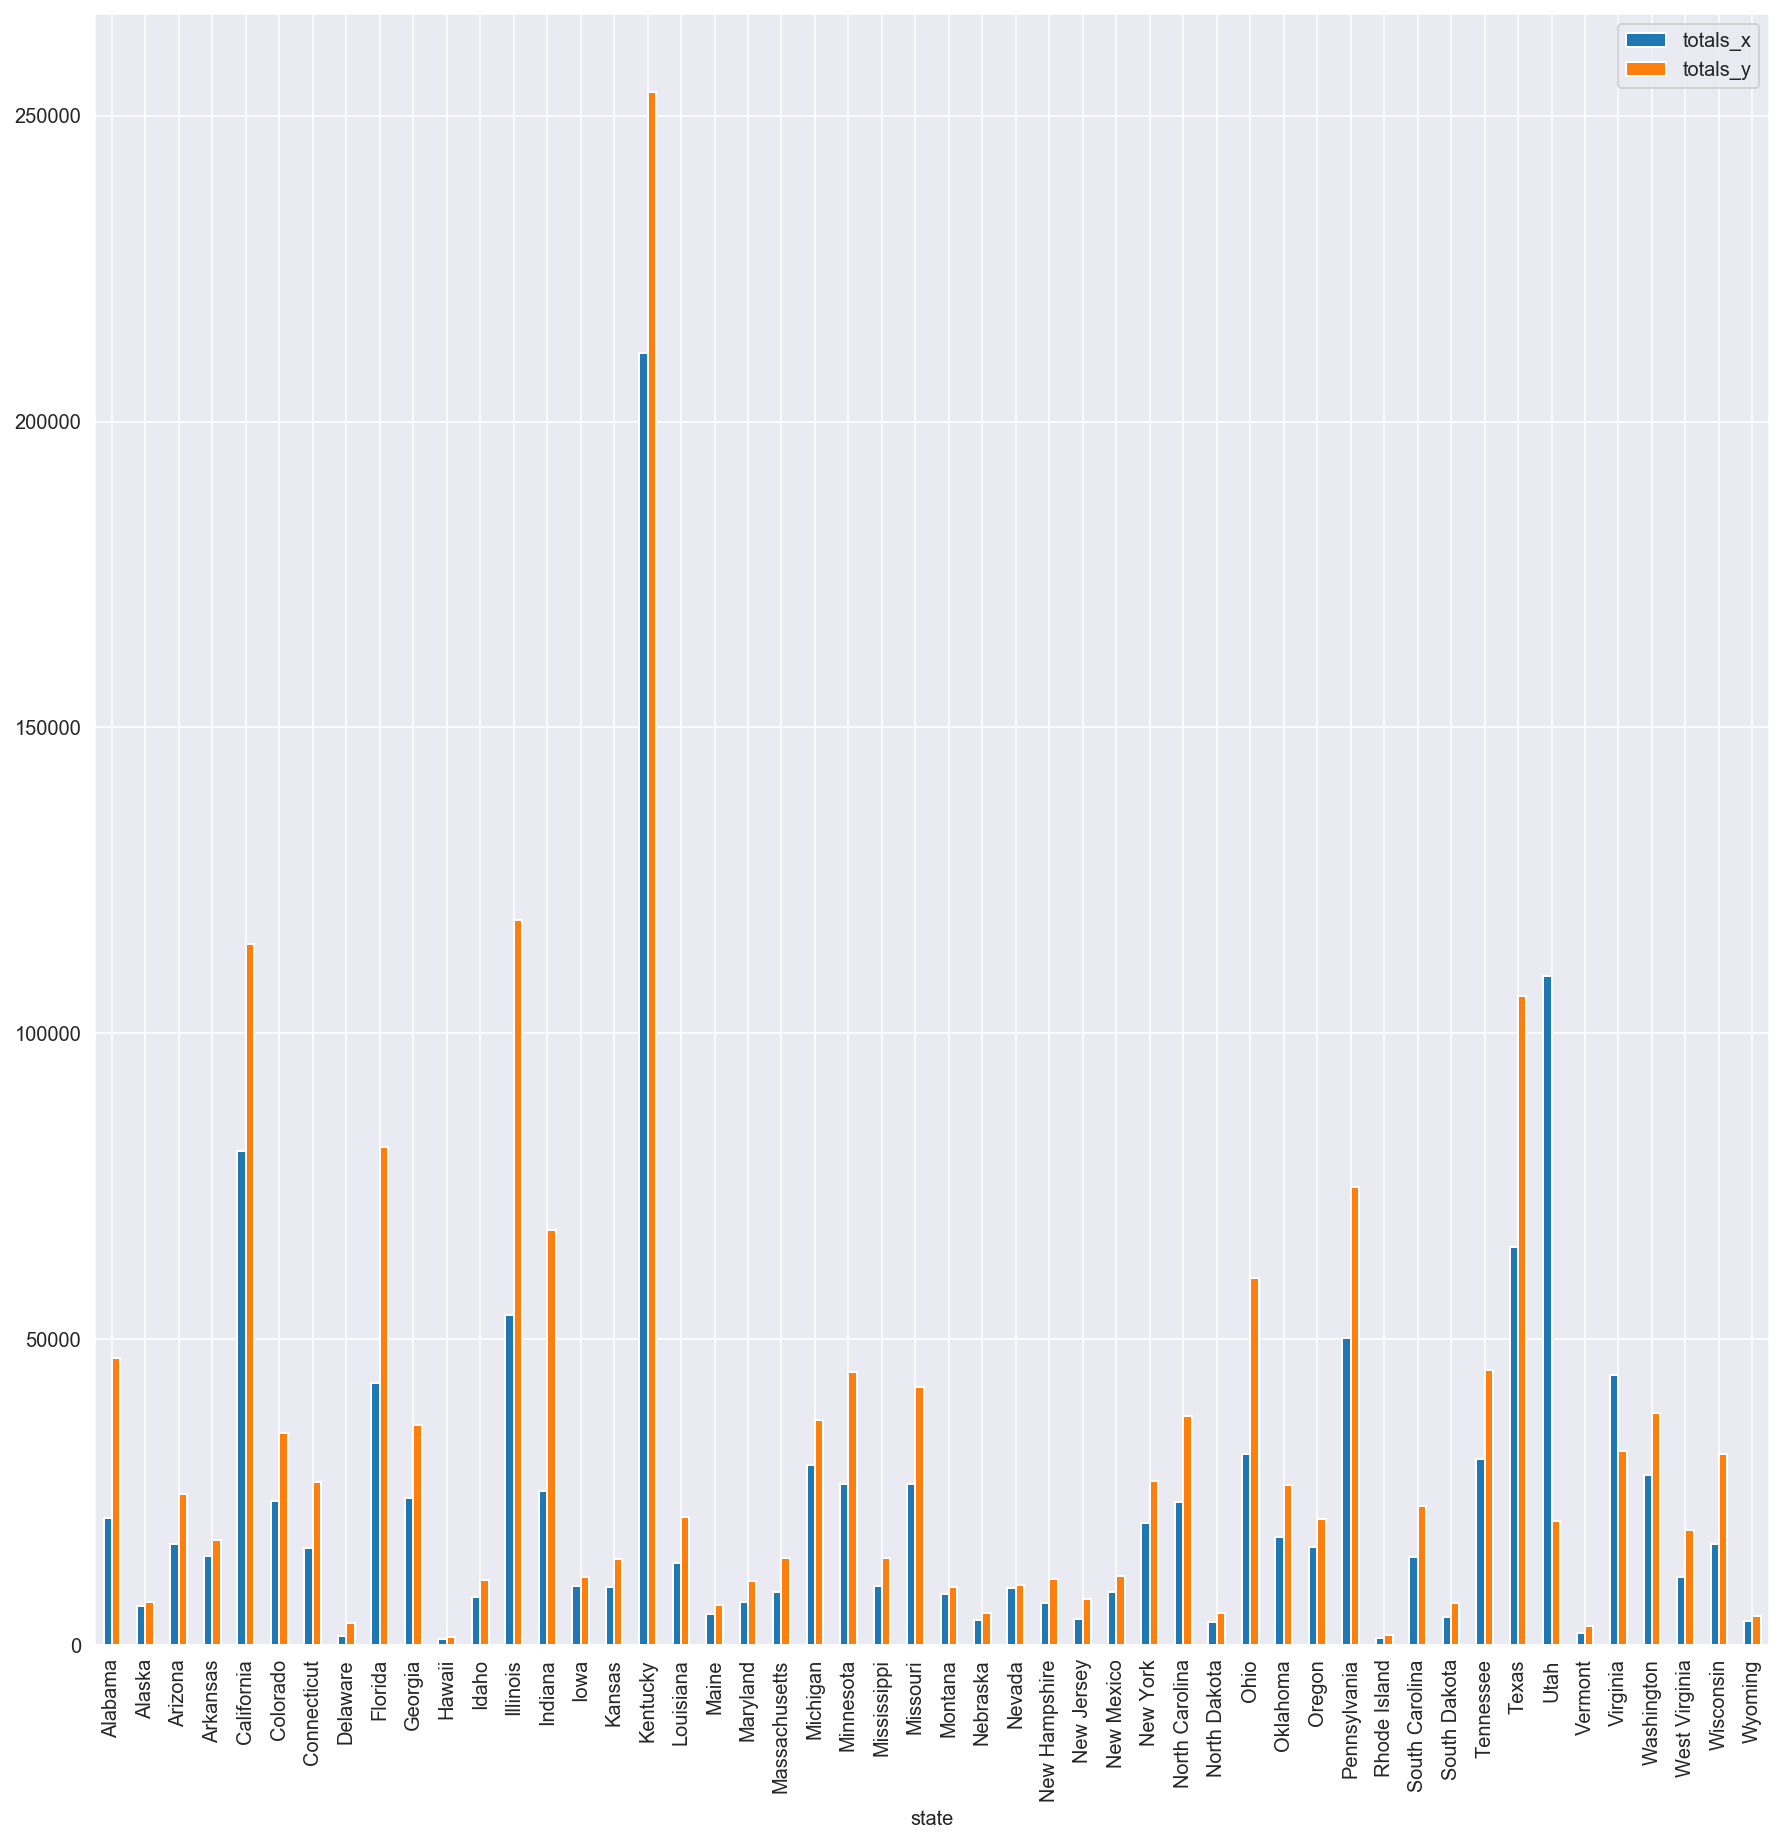

In [150]:
q1_join.plot(x='state', y=["totals_x","totals_y"], kind='bar', figsize = (15,15))

In [275]:
kent_2010 = q1_join[q1_join.state =='Kentucky']['totals_x'] 
kent_2015 = q1_join[q1_join.state =='Kentucky']['totals_y']

print("The number of firearms sold in Kentucky in 2010 is ", kent_2010);
print("The number of firearms sold in Kentucky in 2015 is ", kent_2015);


The number of firearms sold in Kentucky in 2010 is  16    211261
Name: totals_x, dtype: int64
The number of firearms sold in Kentucky in 2015 is  16    253890
Name: totals_y, dtype: int64


#### Insight: 

> When comparing the overall sales of april month in 2010 and 2015, the state of Kentucky has emerged as highest weapons selling state.
> The difference between sales of 2010 and 2015 in the state of Kentucky is around 41,000 firearms.

### Research Question 2:

#### What is per capita firearm sales for all states in April 2010 vs July 2016? 

In [289]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

''' So now we have a question which will require us data from both df_census and df_gun. So we try and get a small 
    dataframe with only relevant columns and get the visualization that can lead to answer to our question.
    
'''

q3 = df_gun[['state','month', 'totals']]

q3= q3[q3['month']=='2016-07-01']
  
q3

,state,month,totals
770,Alabama,2016-07-01,48927
771,Alaska,2016-07-01,6793
772,Arizona,2016-07-01,34496
773,Arkansas,2016-07-01,19378
774,California,2016-07-01,190218
775,Colorado,2016-07-01,43094
776,Connecticut,2016-07-01,29755
777,Delaware,2016-07-01,4494
779,Florida,2016-07-01,125208
780,Georgia,2016-07-01,49183


In [290]:
q3.reset_index(drop=True, inplace=True)   # removed the usual index for aesthetics
q3

,state,month,totals
0,Alabama,2016-07-01,48927
1,Alaska,2016-07-01,6793
2,Arizona,2016-07-01,34496
3,Arkansas,2016-07-01,19378
4,California,2016-07-01,190218
5,Colorado,2016-07-01,43094
6,Connecticut,2016-07-01,29755
7,Delaware,2016-07-01,4494
8,Florida,2016-07-01,125208
9,Georgia,2016-07-01,49183


In [291]:
q3['population_july2016'] = df_cesus['population estimates, july 1, 2016,  (v2016)'].values
q3.head()

,state,month,totals,population_july2016
0,Alabama,2016-07-01,48927,4863300
1,Alaska,2016-07-01,6793,741894
2,Arizona,2016-07-01,34496,6931071
3,Arkansas,2016-07-01,19378,2988248
4,California,2016-07-01,190218,39250017


In [288]:
q3_2010_april = df_gun[['state','month', 'totals']]

q3_2010_april = q3_2010_april[q3_2010_april['month']=='2010-04-01']

q3_2010_april.reset_index(drop=True, inplace=True)

q3_2010_april

,state,month,totals
0,Alabama,2010-04-01,20791
1,Alaska,2010-04-01,6411
2,Arizona,2010-04-01,16578
3,Arkansas,2010-04-01,14563
4,California,2010-04-01,80750
5,Colorado,2010-04-01,23609
6,Connecticut,2010-04-01,15922
7,Delaware,2010-04-01,1439
8,Florida,2010-04-01,42794
9,Georgia,2010-04-01,24065


In [292]:
q3_2010_april['population_april2010'] = df_cesus['population estimates base, april 1, 2010,  (v2016)'].values
q3_2010_april.head()

,state,month,totals,population_april2010
0,Alabama,2010-04-01,20791,4780131
1,Alaska,2010-04-01,6411,710249
2,Arizona,2010-04-01,16578,6392301
3,Arkansas,2010-04-01,14563,2916025
4,California,2010-04-01,80750,37254522


In [293]:
''' we will calulate the per capita percentage by summing all the states and then try showing a graph of the changed 
from 2010 till 2016

'''

q3['total_2010'] = q3_2010_april['totals'].values
q3['population_april2010'] = q3_2010_april['population_april2010'].values

q3

,state,month,totals,population_july2016,total_2010,population_april2010
0,Alabama,2016-07-01,48927,4863300,20791,4780131
1,Alaska,2016-07-01,6793,741894,6411,710249
2,Arizona,2016-07-01,34496,6931071,16578,6392301
3,Arkansas,2016-07-01,19378,2988248,14563,2916025
4,California,2016-07-01,190218,39250017,80750,37254522
5,Colorado,2016-07-01,43094,5540545,23609,5029324
6,Connecticut,2016-07-01,29755,3576452,15922,3574114
7,Delaware,2016-07-01,4494,952065,1439,897936
8,Florida,2016-07-01,125208,20612439,42794,18804592
9,Georgia,2016-07-01,49183,10310371,24065,9688680


In [294]:
# Now let us calculate the capita percentage for 2010 and 2016, and we will use it to plot a graph

capita_10 = q3.total_2010.sum()/q3.population_april2010.sum()

print("Per capita firearms for April 2010 is ", capita_10)

capita_16 = q3.totals.sum()/q3.population_july2016.sum()

print("Per capita firearms for July 2016 is ", capita_16)

Per capita firearms for April 2010 is  0.003978133320178106
Per capita firearms for July 2016 is  0.006777933902633841


In [295]:
# We see that value upon simple division are too small and we should try and get percentage values by multiplying 
# those values with 100. 

capita_10 = capita_10*100
capita_16 = capita_16*100

print("new capita_10: ", capita_10)
print("new capita_16: ", capita_16)

new capita_10:  0.3978133320178106
new capita_16:  0.677793390263384


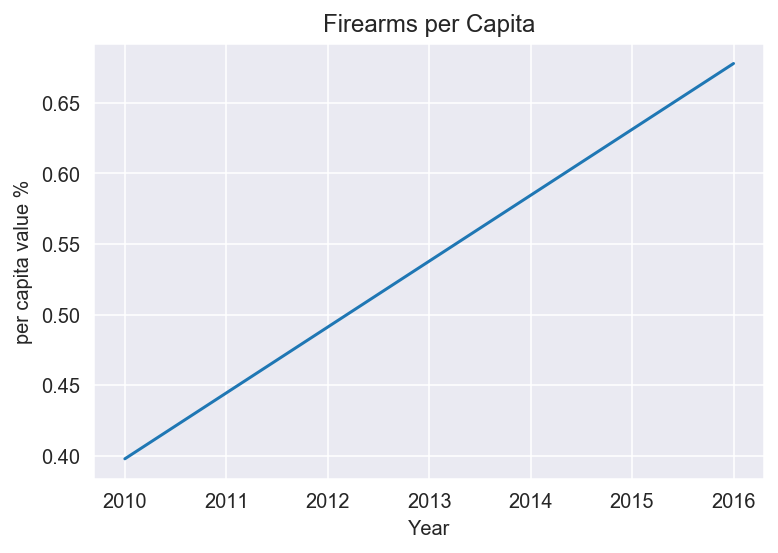

In [296]:
# Now we will try to plot the graph to see the change

years = [2010,2016]
capita_values = [capita_10, capita_16]

plt.title("Firearms per Capita")
plt.xlabel('Year')
plt.ylabel('per capita value %')
plt.plot(years,capita_values)
plt.show()

#### Insights:

> The graph shows us the increase in per capita ownership of firearms. The per-capita value (percentage value) in April 2010 is 0.38 and it goes on to 0.678 in July 2016. 

> Number of things to be considered for this visual. 
 - This chart is a nation-wide chart and does give us a birds-eye view.
 - At state level this graph's slope will vary and hence the insights cannot be generalized.
 - Also, we are using 2 point of time (i.e. April 2010 and July 2016), whereas we have no information about how this per capita relationship will vary over the 6 years between 2010 and 2016. Again, this insight cannot be generalized.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])